<a href="https://colab.research.google.com/github/Nikolay1982Nikolaev/Bayes-Bicocca/blob/main/L11_Metropolis_Hastings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Occorre simulare la distribuzione a posteriori del parametro e a tal
fine si producono delle determinazioni da una distribuzione
strumentale. Questi valori vengono valutati più o meno plausibili per
il parametro

- L’algoritmo proposto da Metropolis nel 1953 per un problema
bidimensionale con un campione di numerosità n = 10 permette di
transitare da uno stato all’altro della catena di Markov considerando
una specifica regola di accettazione del salto. In seguito è stato
esteso da Hastings nel 1970

- si basa sul fatto che è possibile simulare un processo stocastico di
Markov con matrice di transizione omogenea nel tempo in cui ogni
stato può essere raggiunto da tutti gli altri in un numero finito di
passi, senza stati assorbenti, la cui distribuzione di equilibrio è la
distribuzione a posteriori per il parametro/i
- Le realizzazioni generate da questa catena dopo molte iterazioni
possono essere assunte come determinazioni della distribuzione di
equilibrio

- In pratica si tratta di un metodo di campionamento definito
dependent sampling in quanto permette di utilizzare il numeratore
della regola bayesiana per generare realizzazioni plausibili per il
parametro
- Il primo passo dell’algoritmo richiede la scelta di una distribuzione di
campionamento, detta jumping distribution, che possa generare dei
passaggi di stato con diversa verosimiglianza sotto l’ipotesi di
reversibilità della catena di Markov

- Per ogni interazione (iterazione - t) si propone un nuovo valore del parametro $\theta^*$ in base ad una certa distribuzione , ad esempio una distribuzione Gaussina, valutata rispetto al precedente valore $\theta^{t-1}$

- Il rapporto di Metropolis-Hastings è una quantità anche chiamata
kernel di transizione della catena di Markov definisce la distribuzione
condizionata che determina le transizioni tra gli stati

- Il kernel di transizione deve essere definito nel supporto della
distribuzione a posteriori e ha due componenti di cui uno continuo e
l’altro discreta

- La catena deve esplorare l’intero spazio degli stati: la frequenza
media di riferimento per le transizioni è 0.234 ovvero solo il 23% dei
valori candidati dovrebbe essere accettato al fine di ottenere
un’esplorazione esaustiva dello spazio parametrico

- Si noti che, come riportato nel riquadro che schematizza l’algoritmo,
il rapporto r coinvolge a numeratore la distribuzione a posteriori non
normalizzata calcolata rispetto al valore candidato $\theta^*$

- mentre il denominatore coinvolge la distribuzione a posteriori
calcolata rispetto al valore del parametro al passo precedente
dell’algoritmo t - 1

- Il rapporto esprime la probabilità di muoversi o meno rispetto alla
locazione attuale del parametro. Il ratio è confrontato con la
probabilità casuale di muoversi ovvero rispetto ad un numero
pseudo-casuale generato dalla distribuzione uniforme

- Se r > u si accetta il valore proposto per il parametro $\theta^*$ altrimenti
si rifiuta e si prosegue considerando un altro valore candidato.

- Più in dettaglio l’algoritmo Metropolis-Hastings (MH) definisce la
seguente regola che genera una catena di Markov sul supporto $p(\theta|y)$



- si campiona una possibile valore candidato $\theta^*$ da una distribuzione proposta $J_t(\theta^*, \theta^{(t-1)})$
- si calcola il seguenta valore che e' il risultato del rapporto MH

$$r = \frac{p(\theta^*|y)J_t(\theta^*, \theta^{(t-1)})   }{p(\theta^{t-1}|y)J_t(\theta^{(t-1)}, \theta^*)   }$$

- si stabilisce $\alpha= min(1, R)$

- si stabilishe se il valore proposto puo essere accettato estraendo un valore dalla distribuzione uniforme $U\sim Unif(0, 1)$

- se $u \leq \alpha$ allora si accetta il valore candidato $\theta^t = \theta^*$

- altrimenti si rifiuta e risulta $\theta^t = \theta^{t-1}$

Termine

Un semplice esempio di applicazione è quello che utilizza un
processo Random Walk (RW si veda la sezione delle dispense
dedicata alla passeggiata casuale) che consiste nel selezionare il
valore candidato $\theta^*$ considerando delle piccole perturbazioni attorno al valore corrente del parametro $\theta^t$

$$\theta^* = \theta^t + \epsilon$$

dove la densita di $h(\epsilon)$ puo essere specificata in scariati modi tra cui:

- $\epsilon_j \sim Unif(-\delta_j, \delta_j)$ con j che indicizza le componente di $\epsilon= (\epsilon_1...\epsilon_j)'$

$\epsilon \sim N(0, Ω)$ - in questo caso la specificazione della matrice di
varianza-covarianza è fondamentale: elevati valori sulla diagonale
(alte varianze) implicano che lo spazio parametrico potrebbe essere
spostato molto lontano (molti valori potrebbero essere rifiutati
perchè il punto candidato si trova in una regione di bassa probabilità
posteriori)

MH - modello Gaussiano

Partendo da un valore iniziale $\theta^{t-1}$ e assumendo un processo RW si genera una realizzazione da $\epsilon \sim N(0, d^2)$ per stimare la distribuzione a posteriori del modello coniugato Gaussiano (anche se e' noto il risultato esatto)

Il valore candidato $\theta'$ viene simulato in base alla seguente equazione

$$\theta^{(s)}= \theta^{(t-1)} + \epsilon$$

Il rapporto di MH

$$R = \frac{exp[-\frac{1}{2\sigma^2}(\theta^0 - \theta^{(t)})^2] exp[-\frac{1}{2\tau^2}(\theta^{(s)}- \mu)^2]}{  exp[-\frac{1}{2\sigma^2}(\theta^0 - \theta^{(t-1)})^2] exp[-\frac{1}{2\tau^2}(\theta^{(t-1)}- \mu)^2]}  $$

Il valore di questo rapporto viene utilizzato per assegnare la
probabilità all’evento successo (ovvero provabilità di accettare il
valore candidato) che si sceglie come min[R; 1]


Se si verifica l’evento successo si accetta il valore candidato $\theta'$ come
valore realizzato della distribuzione a posteriori altrimenti se si rifiuta
il candidato e si procede campionando un nuovo candidato.



figure



- La distribuzione da cui vengono originati i valori candidati comporta
che la catena abbia le proprietà di irriducibilità e di aperidicità
essenziali per la convergenza dell’algoritmo

- Nell’esempio precedente occorre scegliere la varianza d della
distribuzione da cui si genera il valore candidato

- Se d è grande rispetto a quello della distribuzione a posteriori questo
implica un elevato tasso di rifiuto per i valori candidati

## Controllo della convergenza dell’algoritmo

- L’analisi della convergenza viene effettuata con diverse tecniche
diagnostiche e si rende necessaria per determinare se l’algoritmo ha
eseguito un numero di passi sufficiente

- Le procedura diagnostiche sono volte a determinate la stabilità della
tecnica numerica utilizzata che per natura è soggetta ad errori di
approssimazione

- In pratica non è possibile quantificare in modo esatto l’errore Monte
Carlo. A tal fine è opportuno che le tecniche MCMC vengano
utilizzate con cautela.

- Il periodo di burn in è il numero previsto di passi necessari affinche la
catena di Markov raggiunga il sottospazio degli stati tipici, ovvero
quella parte dello spazio parametrico, che è in prossimità della
distribuzione di equilibrio o distribuzione target

- L’autocorrelazione tra gli stati della catena di Markov  deve essere minima. Generalmente l’autocorrelazione
tra valori realizzati decresce al crescere del numero di iterazioni

- I principali test statistici valutano la distanza necessaria tra le
osservazioni affinchè queste possano essere considerate indipendenti



Valutano il tasso di accettazione: un tasso ottimale che rende plausibile la distribuzione da cui si generano i valori è compreso tra il
23% ed il 45%

Ripetono la procedura partendo da diversi valori iniziali creando
catene multiple

Utilizzano analisi grafiche tra cui il sample path o trace plot dei
valori generati per il parametro ad ogni iterazione verificando se si
concentrano intorno ad un valore medio


La distribuzione target, per le proprietà della catena di Markov, si
ottiene come limite e pertanto si parla di burn-in quando si
eliminano le prime realizzazioni in modo da ridurre la loro influenza
sulla distribuzione finale

Valutano la funzione di autocorrelazione dei valori ottenuti a diversi
lag ed il suo decadimento a zero. Elevate autocorrelazioni indicano
che lo spazio dei parametri non viene esplorato accuratamente e
pertanto comportano una maggiore variabilità nelle stime

Se ciò accade si verifica la situazione denominata in inglese di slow
mixing ovvero la tendenza ad avere alta correlazione


Per risolvere questo problema si utilizza una procedura definita
thinning che consiste nel salvare solo un numero ridotto di
realizzazioni ad esempio solamente 1 su 10 numeri accettati

Il procedimento comporta una riduzione dell’autocorrelazione ma
anche un maggiore richiesta in termini di tempi computazionali
perchè si eliminano in questo modo molte realizzazioni, ad esempio
9/10 delle realizzazioni ottenute ed accettate sarebbero scartate


La Figura 4 mostra il trace plot in tre diverse situazioni che possono
presentarsi al termine delle iterazioni dell’algoritmo

Nella prima figura in alto si parla di good mixing perchè i valori
realizzati oscillano in modo regolare intorno ad un valore medio per
tutte le iterazioni successive

Nella seconda figura si mostra un trace plot che evidenzia l’esigenza
di utilizzare il burn in

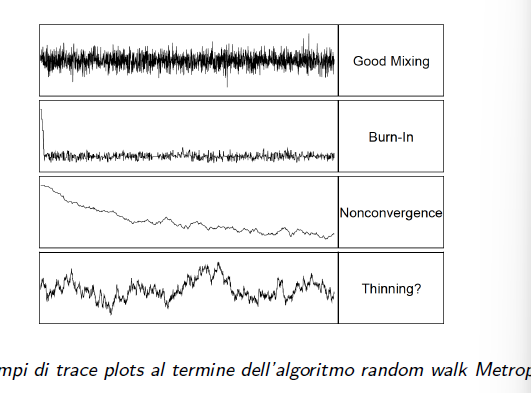

Test di Geweke: Verifica la convergenza confrontando i valori medi
del parametro nella prima e dell’ultima parte delle realizzazioni

Supponiamo di dividere i valori campionati in due gruppi (A e B),
uno contenente il 10% delle osservazioni generate per prime nella
serie, mentre l’altro l’ultimo 50% delle osservazioni generate

Siano $\bar{\theta^A}$ e $\bar{\theta^B}$ le medie dei due sottocampioni $T_A, T_B$ le rispettive ampiezza campionarie e $S^A, S^B$ le rispettive varianze campionarie

La corrispondente statistica test Z è la seguente
$$Z = \frac{\theta^A- \theta^B}{\sqrt{S_A /T_A + S+B/T_B} }$$


Dato che Z ha una distribuzione normale standard i valori di Z che
cadono nelle code della distribuzione (jZj > 2) indicano la presenza
di differenze fra le medie della prima e dell’ultima porzione di valori
campionati, ossia una non convergenza della catena


Test di Raftery-Lewiss: Il test fornisce una stima del fattore di
dipendenza seriale I e se I = 1, i valori generati sono indipendenti

## Test di Gelman-Rubin

Verifica se più catene convergono verso la stessa distribuzione target

La statistica d’interesse è data da

$$\hat{R}= \frac{\hat{V}}{WSS}= \frac{   T-1}{T
} + \frac{\frac{BSS}{T'} k+1}{WSS .k}$$

- k -numero di catene generate
- T - numero di iterazioni a meno di burn in e thinning per ciasuna catena
- BSS/T 0 ;a varianza dei valori medi a posteriori per tutte le catene - varianza between

- WSS - la media delle varianze di ciascuna catena - varianza within

- $\hat{V}$ - la stima della varianza a posteriori per tutte le catene

MCMC e' giunta a convergenza se $\hat{R} \sim 1$


## Test di Heidelberg e Welch
Verifica se la catena di Markov è un processo covariante
(debolmente) stazionario.

Nella prima parte si calcola la statistica test di Cramer von-Mises
sull’intera catena, si accetta o rifiuta l’ipotesi nulla di stazionarietà
e, nel caso di rifiuto, si prosegue eliminando il 10% dei valori
campionati, ripetendo il test sui valori rimanenti. Ad ogni rifiuto
dell’ipotesi nulla si prosegue eliminando un ulteriore 10% dei valori
campionati fino a quando l’ipotesi nulla viene accettata (test
superato) o fino a quando non si rimuove il 50% dei valori
campionati (test non superato)



## Grandezza di campionamento effettiva (ESS)

La seguente misura definita effective sample size ESS per valutare la
bontà del mixing della catena di Markov

$$ESS = \frac{n}{1 + s\sum_{k=1}^{(n-1)}\rho_k(\theta)}$$

L’efficienza dell’algortimo si valuta in base alla distanza tra ESS e n:
tanto più ESS e n sono simili tanto migliore è il mixing della catena;
un valore di ESS intorno a 1000 in genere permette di stabilire che
la densità a posteriori potrebbe essere adeguata

## Applicazione dell’algoritmo M-H al modello Gaussiano

In [2]:
theta0 <- 3
mu <- 0
tau <- 2
sigma <- 1
d <- 1


nsim <- 10
theta <- rep(0,nsim)

theta[1] <- theta0
set.seed(173)
for(i in 2:nsim){
  # generazione del valore candidato
  theta.p <- theta[i-1] + rnorm(1,0,d)
      print(theta.p)
  # calcolo del ratio
  ratio <- dnorm(theta0, theta.p, sigma)*dnorm(theta.p, mu, tau)/
            (dnorm(theta0,theta[i-1], sigma)*dnorm(theta[i-1], mu, tau))
  print(ratio)
    # generiamo un numero della distribuzione di Bernuolli
  evento <- rbinom(1,1,min(ratio,1))
  print(evento)
  theta[i] <- if(evento==1) theta.p else theta[i-1]
}




[1] 4.053903
[1] 0.2265882
[1] 0
[1] 3.508671
[1] 0.5808754
[1] 0
[1] 2.547716
[1] 1.23536
[1] 1
[1] 2.889819
[1] 0.8725684
[1] 1
[1] 2.621191
[1] 1.126791
[1] 1
[1] 1.727008
[1] 0.7768596
[1] 1
[1] 3.12177
[1] 0.95837
[1] 0
[1] 1.859567
[1] 1.105759
[1] 1
[1] 1.043704
[1] 0.3801577
[1] 0


In [3]:
mean(theta)

[1] 2.423188

In [4]:
# Calcoliamo il valore della media della distribuzione a posteriori
xnn <- theta0
n <- 1
mu1 <- (mu*sigma^2 + (n*xnn*tau^2))/(n*tau^2 + sigma^2); mu1


[1] 2.4

In [6]:
# Simuliamo i valori della distribuzione a posteriori per nsim = 10^5
nsim <- 10^5
theta[1] <- theta0
for(i in 2:nsim){
  # generazione del valore candidato
  theta.p <- theta[i-1] + rnorm(1,0,d)
  # calcolo del ratio
  ratio <- dnorm(theta0, theta.p, sigma)*dnorm(theta.p, mu, tau)/
            (dnorm(theta0,theta[i-1], sigma)*dnorm(theta[i-1], mu, tau))
  # generiamo un numero della distribuzione di Bernuolli
  evento <- rbinom(1,1,min(ratio,1))
  theta[i] <- if(evento==1) theta.p else theta[i-1]
}

# Valutiamo le realizzazioni dei valori accettati
summary(theta)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.163   1.804   2.412   2.415   3.021   6.390 

In [7]:
# verifichiamo se occorre il burn in
theta1 <- theta[-(1:nsim/2)]
summary(theta1)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.163   1.807   2.412   2.417   3.017   6.231 

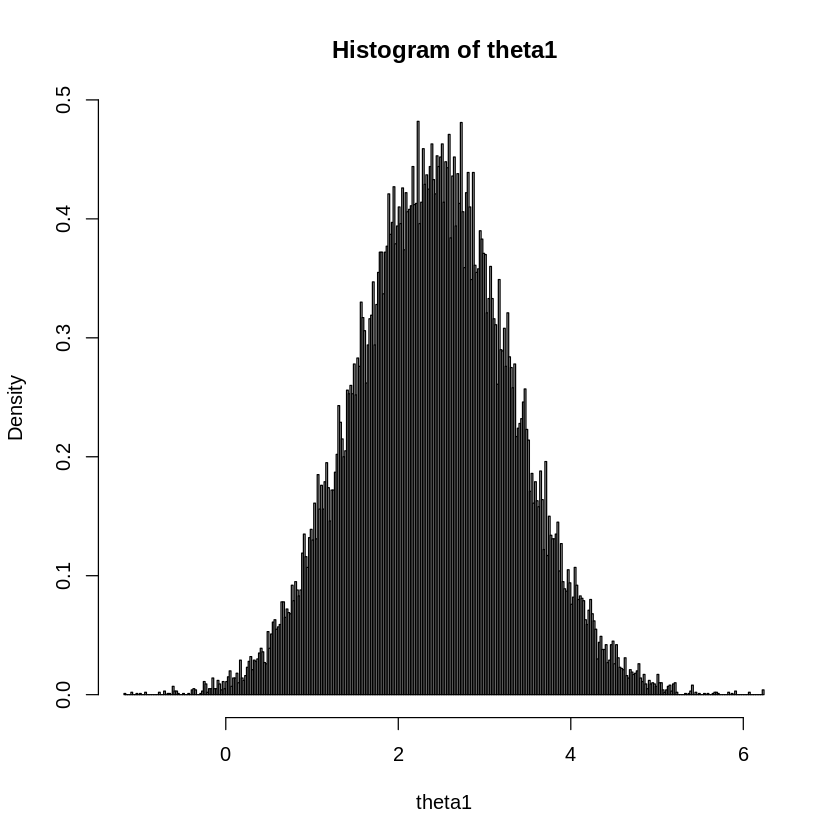

In [8]:
# Disegnamo la distribuzione simulata a posteriori con l’istograma delle realizzazioni accettate dopo aver applicato il burn in
hist(theta1, freq = FALSE, breaks = 300)


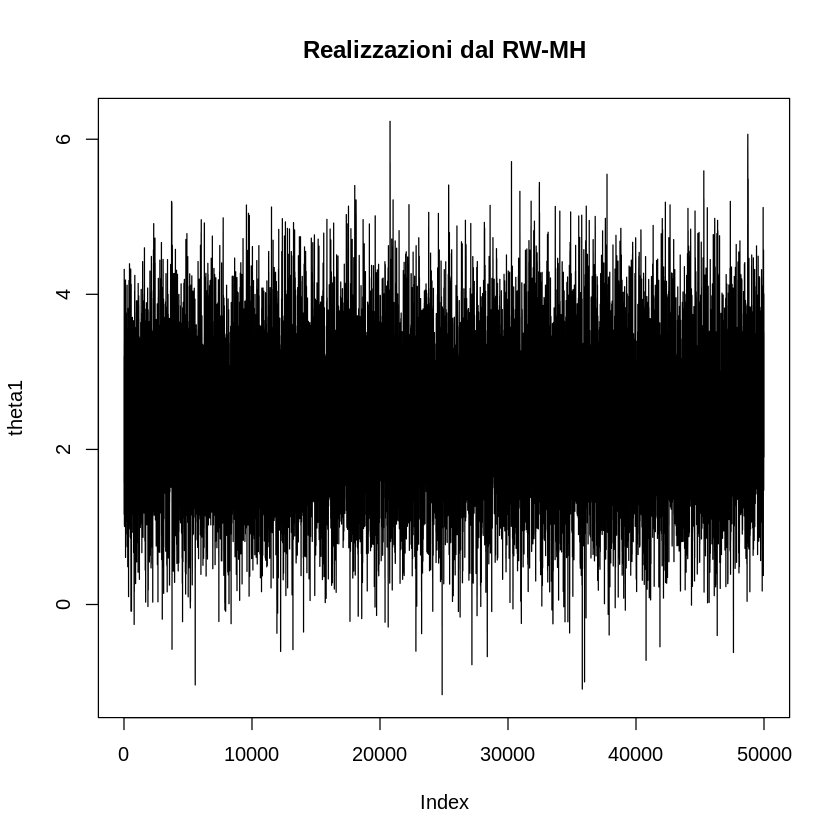

In [9]:
# La forma della distribuzione è coerente con quella attesa con il risultato analitico
# Valutiamo il trace plot
plot(theta1, type = "l", main = "Realizzazioni dal RW-MH")


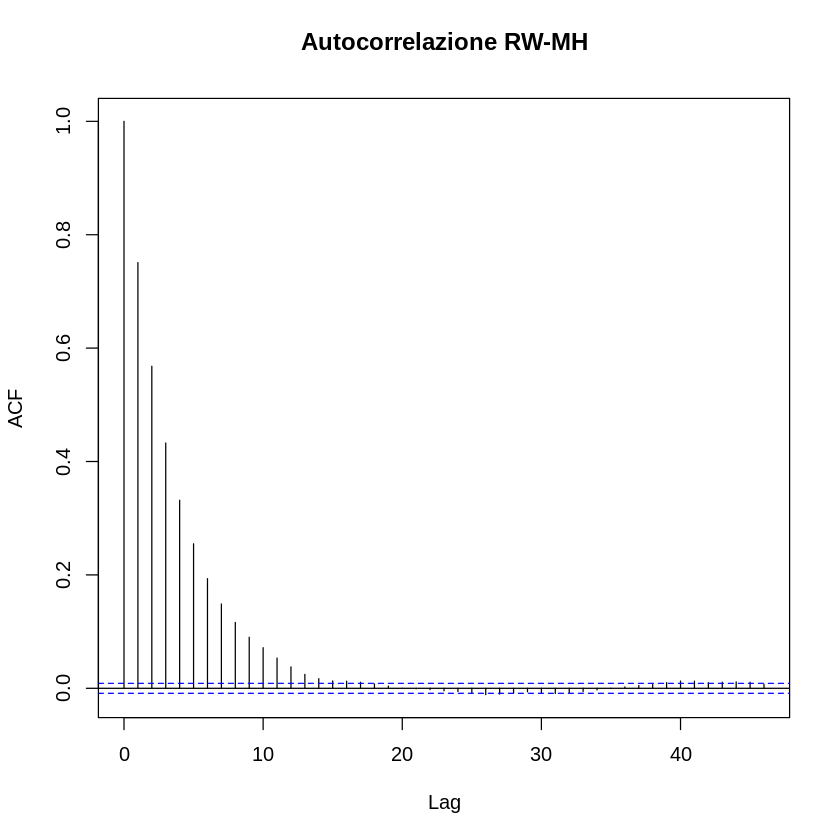

In [10]:
# l’autocorrelazione disegnando la funzione
acf(theta1, main = "Autocorrelazione RW-MH")


In [12]:
install.packages("LaplacesDemon")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
# Altre misure dignostiche  fornite dalla libreria LaplaceDemon
require(LaplacesDemon)

IAT(theta1)


Loading required package: LaplacesDemon



[1] 7.276805

In [14]:
1/IAT(theta1)

ESS(theta1)

[1] 0.137423

[1] 6882.188